In [1]:
# --- EDA for Moodify Dataset ---

# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Load the dataset
file_path = '../data/278k_labelled_uri.csv'
df = pd.read_csv(file_path)

In [5]:
# Quick Overview
print("Dataset shape:", df.shape)
print("\nColumns:\n", df.columns)
print("\nData types:\n", df.dtypes)
print("\nNull values:\n", df.isnull().sum())

Dataset shape: (277938, 15)

Columns:
 Index(['Unnamed: 0.1', 'Unnamed: 0', 'duration (ms)', 'danceability', 'energy',
       'loudness', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'spec_rate', 'labels', 'uri'],
      dtype='object')

Data types:
 Unnamed: 0.1          int64
Unnamed: 0            int64
duration (ms)       float64
danceability        float64
energy              float64
loudness            float64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
spec_rate           float64
labels                int64
uri                  object
dtype: object

Null values:
 Unnamed: 0.1        0
Unnamed: 0          0
duration (ms)       0
danceability        0
energy              0
loudness            0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo         

In [6]:
# Rename 'labels' to 'emotion' for clarity
label_mapping = {0: 'Sad', 1: 'Happy', 2: 'Energetic', 3: 'Calm'}
df['emotion'] = df['labels'].map(label_mapping)

In [7]:
# Drop redundant columns
df = df.drop(columns=['Unnamed: 0', 'Unnamed: 0.1', 'labels'])

In [12]:
# Show first 5 rows
print("Sample Data:\n")
display(df.head())

Sample Data:



,duration (ms),danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,spec_rate,uri,emotion
0,195000.0,0.611,0.614,-8.815,0.0672,0.0169,0.000794,0.7530,0.520,128.050,3.446154e-07,spotify:track:3v6sBj3swihU8pXQQHhDZo,Energetic
1,194641.0,0.638,0.781,-6.848,0.0285,0.0118,0.009530,0.3490,0.250,122.985,1.464234e-07,spotify:track:7KCWmFdw0TzoJbKtqRRzJO,Happy
2,217573.0,0.560,0.810,-8.029,0.0872,0.0071,0.000008,0.2410,0.247,170.044,4.007850e-07,spotify:track:2CY92qejUrhyPUASawNVRr,Happy
3,443478.0,0.525,0.699,-4.571,0.0353,0.0178,0.000088,0.0888,0.199,92.011,7.959809e-08,spotify:track:11BPfwVbB7vok7KfjBeW4k,Sad
4,225862.0,0.367,0.771,-5.863,0.1060,0.3650,0.000001,0.0965,0.163,115.917,4.693131e-07,spotify:track:3yUJKPsjvThlcQWTS9ttYx,Happy


C:\Users\Usuario\AppData\Local\Temp\ipykernel_3300\350480152.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


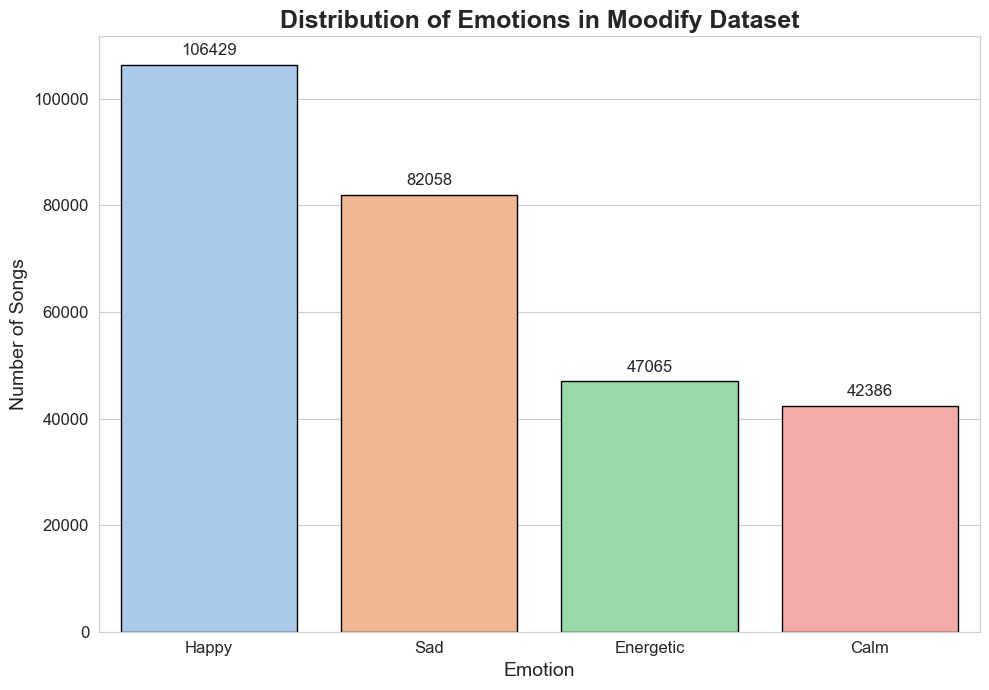

In [23]:
# --- 1. Class Distribution ---

plt.figure(figsize=(10, 7))  
sns.set_style('whitegrid')  

# Create the countplot
sns.countplot(
    data=df,
    x='emotion',
    order=['Happy', 'Sad', 'Energetic', 'Calm'],
    palette='pastel',  
    edgecolor='black'   
)

# Titles and labels
plt.title('Distribution of Emotions in Moodify Dataset', fontsize=18, fontweight='bold')
plt.xlabel('Emotion', fontsize=14)
plt.ylabel('Number of Songs', fontsize=14)

# Tweak tick parameters
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add exact counts above bars
for p in plt.gca().patches:
    plt.gca().annotate(
        f'{p.get_height():.0f}',  # format safely
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='center',
        xytext=(0, 10),
        textcoords='offset points',
        fontsize=12
    )

plt.tight_layout()
plt.show()


In [16]:
# --- 2. Basic Statistics ---
print("\nBasic Statistics:\n")
display(df.describe())


Basic Statistics:



,duration (ms),danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,spec_rate
count,2.779380e+05,277938.000000,277938.000000,277938.000000,277938.000000,277938.000000,277938.000000,277938.000000,277938.000000,277938.000000,2.779380e+05
mean,2.324961e+05,0.552583,0.556866,-10.363654,0.087913,0.386583,0.255044,0.189217,0.449602,119.196002,4.754654e-07
std,1.171830e+05,0.188905,0.279681,6.672049,0.112500,0.364504,0.373745,0.163596,0.267471,30.462256,9.190229e-07
min,6.706000e+03,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,1.720130e+05,0.431000,0.342000,-12.747000,0.035900,0.033800,0.000000,0.096200,0.220000,95.072250,1.531461e-07
50%,2.131055e+05,0.571000,0.591000,-8.397000,0.047100,0.262000,0.001090,0.121000,0.434000,119.940000,2.345459e-07
75%,2.648660e+05,0.693000,0.792000,-5.842000,0.082200,0.754000,0.645000,0.227000,0.665000,138.869750,4.449937e-07
max,3.919895e+06,0.989000,1.000000,4.882000,0.965000,0.996000,1.000000,1.000000,1.000000,244.947000,5.971860e-05


In [17]:
# --- 3. Feature Distributions ---
features = ['danceability', 'energy', 'loudness', 'speechiness', 
            'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']

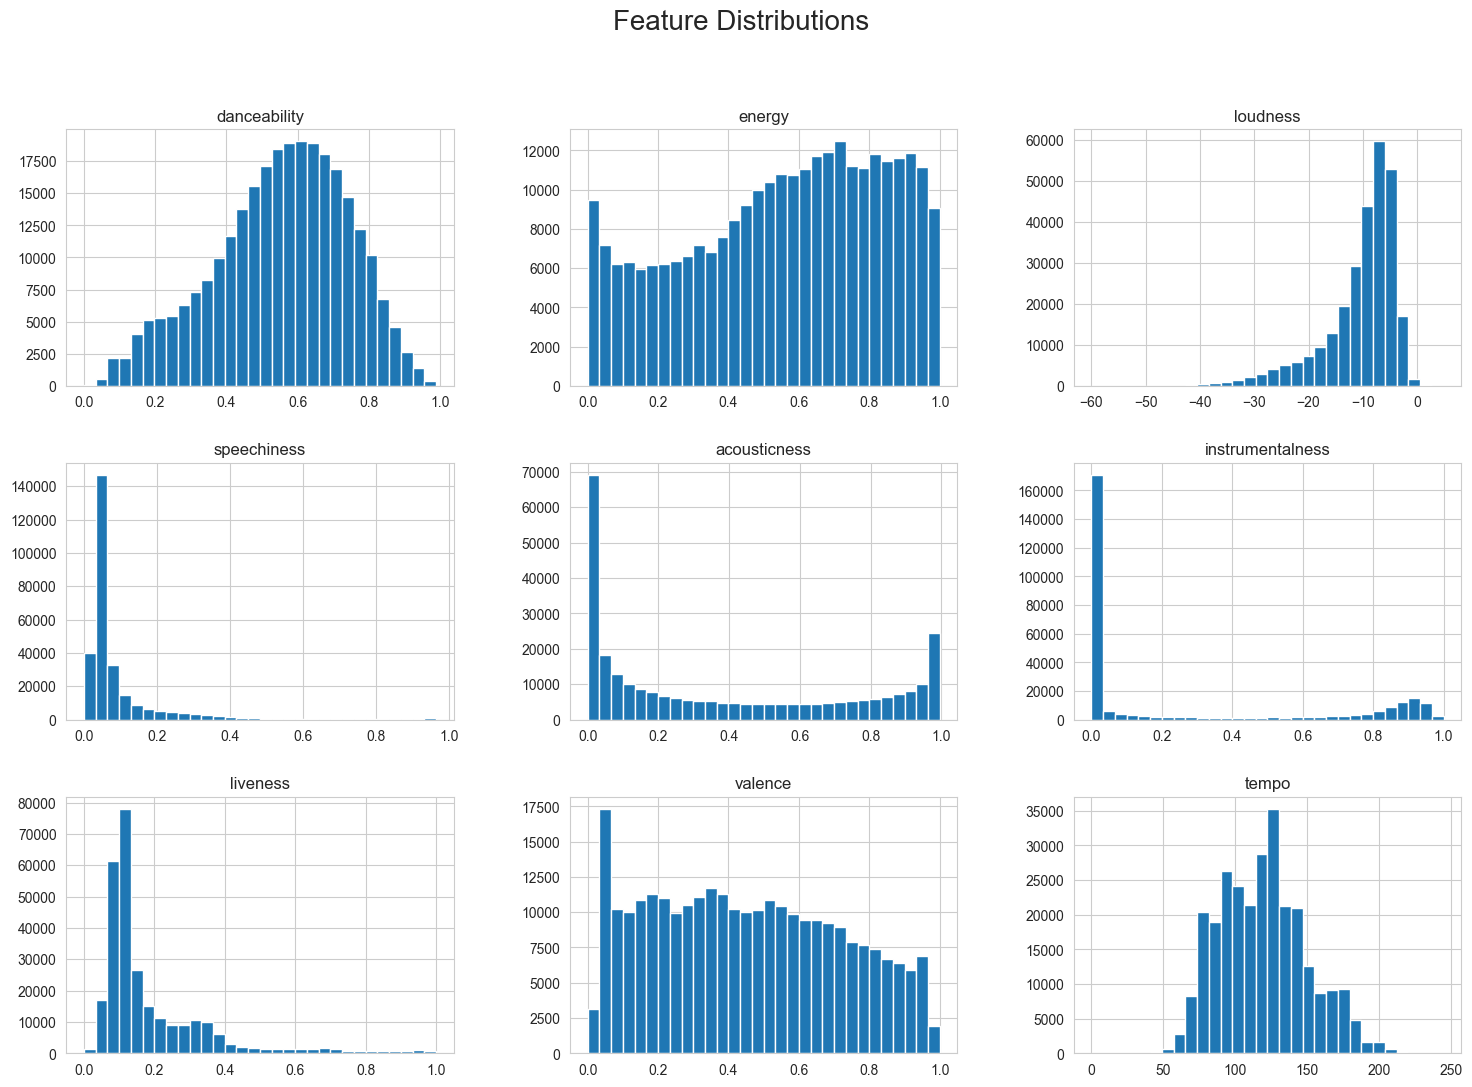

In [24]:
# Plot histograms
df[features].hist(bins=30, figsize=(18,12))
plt.suptitle('Feature Distributions', fontsize=20)
sns.set_style('whitegrid')
plt.show()

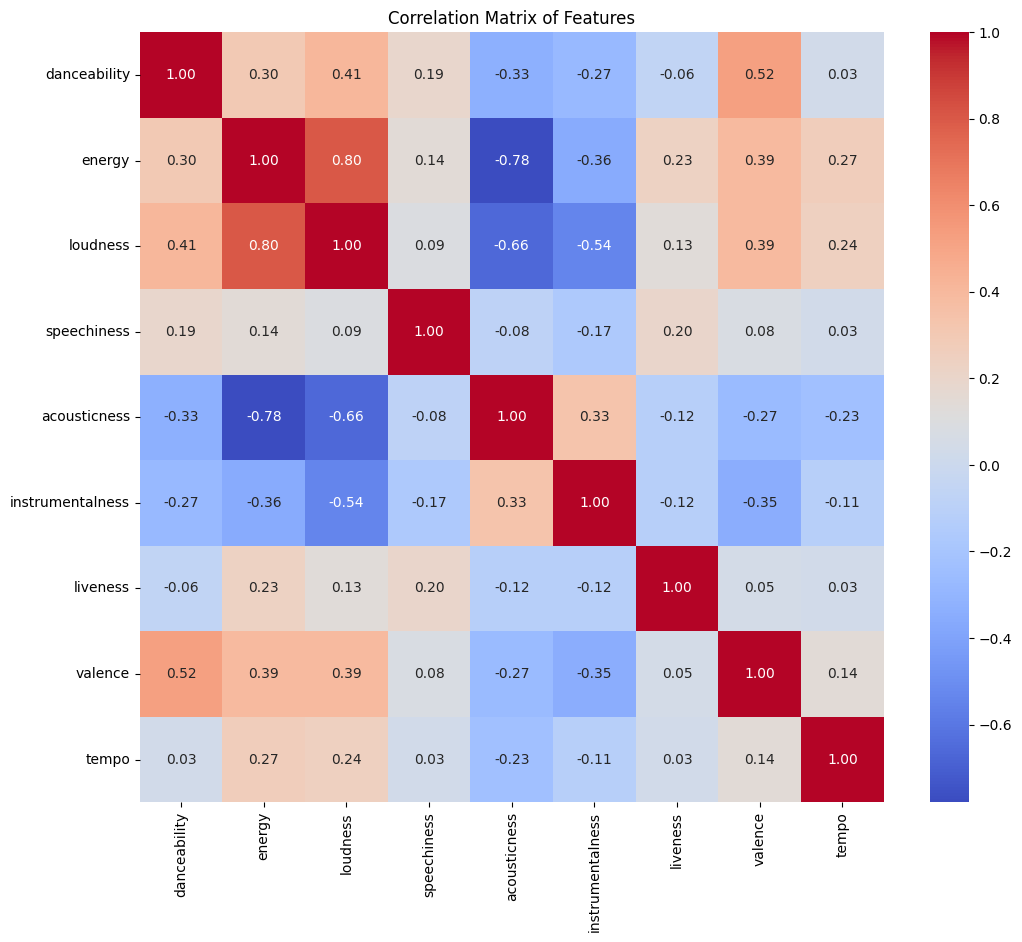

In [19]:
# --- 4. Correlation Matrix ---
plt.figure(figsize=(12,10))
corr_matrix = df[features].corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix of Features')
plt.show()

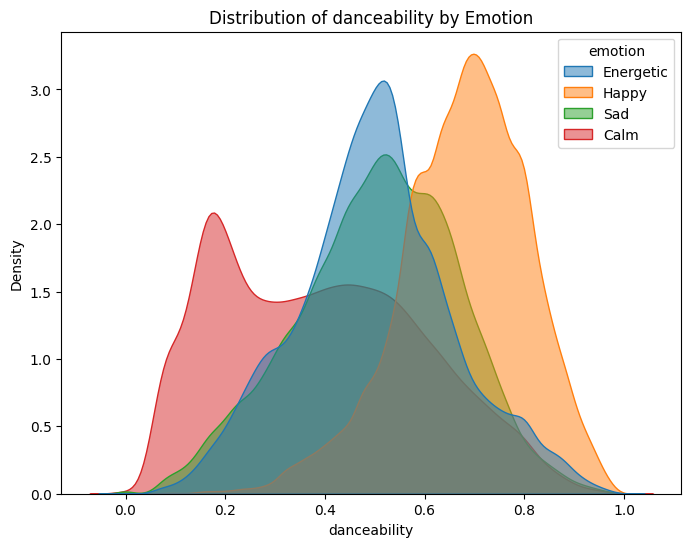

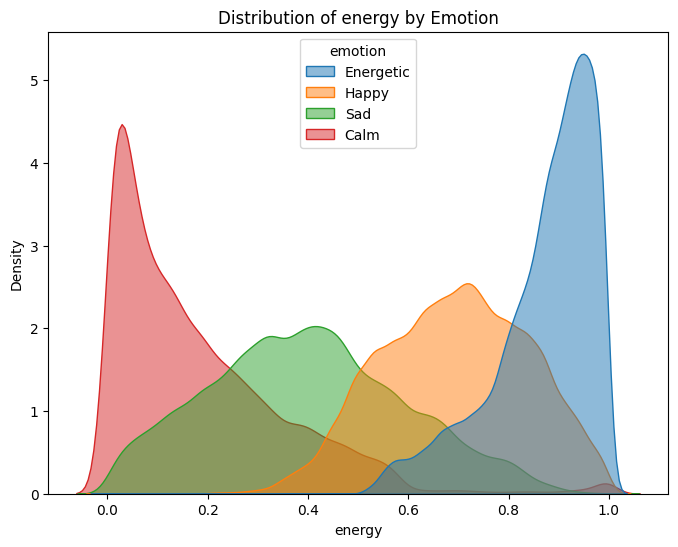

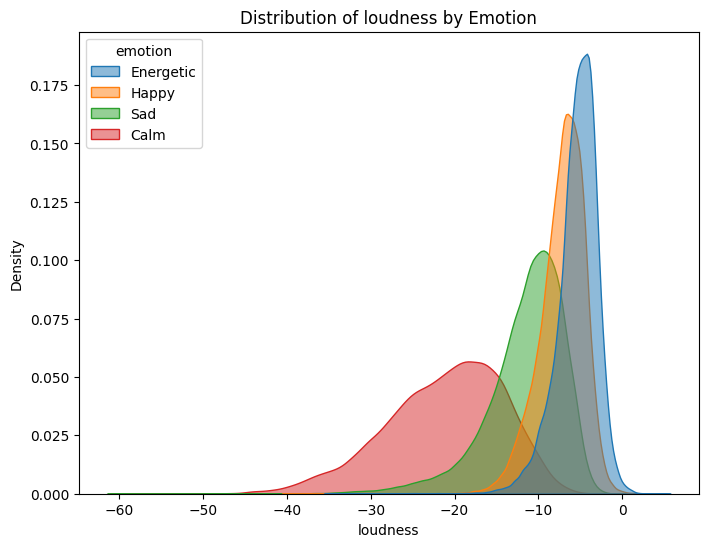

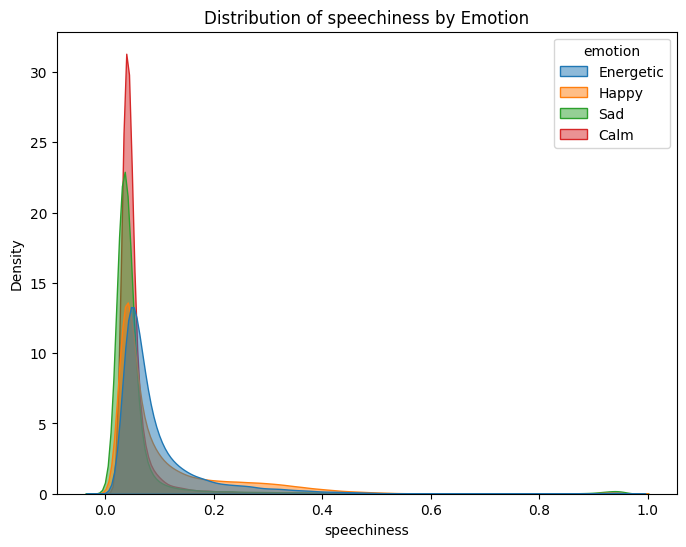

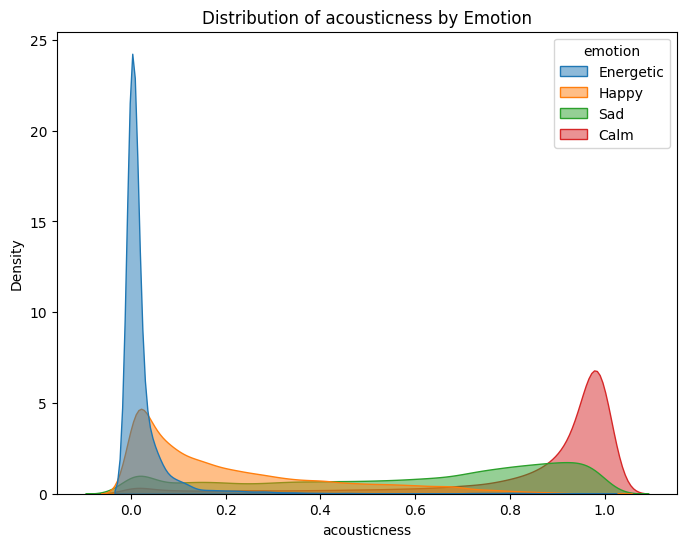

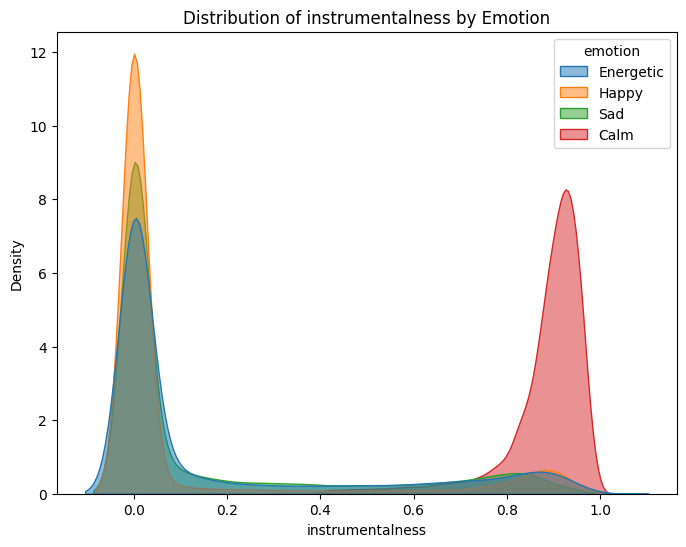

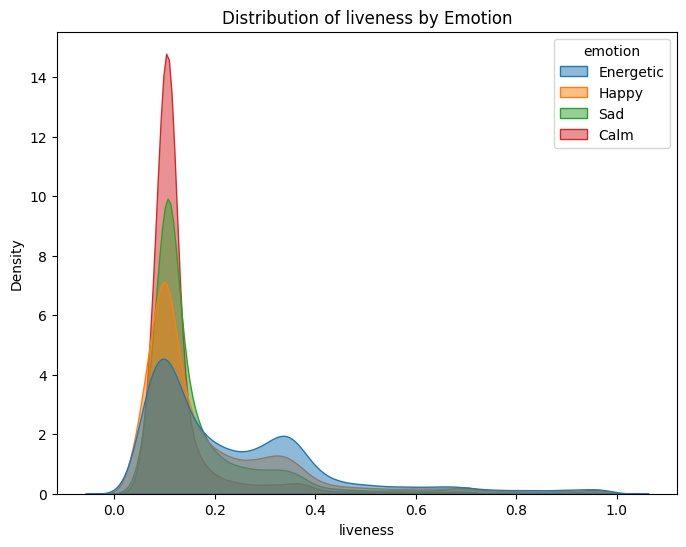

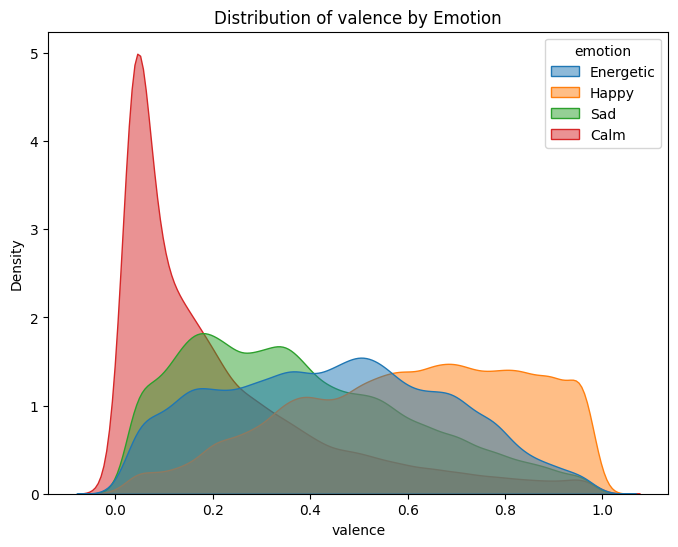

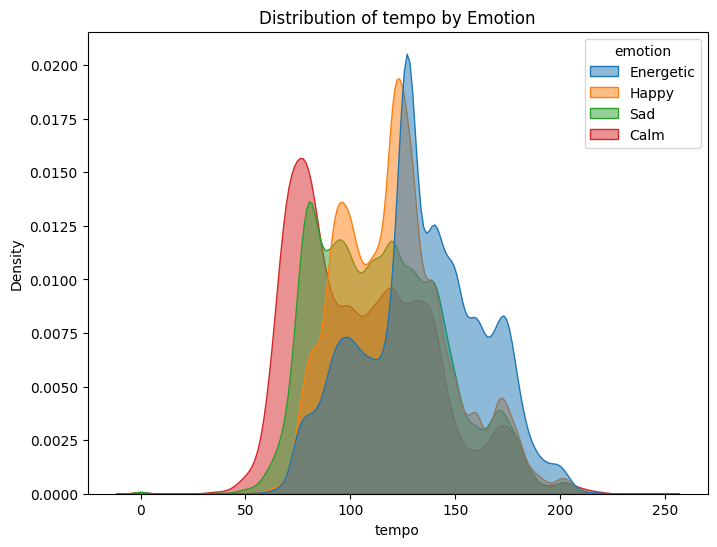

In [21]:
# --- 5. Feature Distributions per Emotion ---
for feature in features:
    plt.figure(figsize=(8,6))
    sns.kdeplot(data=df, x=feature, hue='emotion', fill=True, common_norm=False, alpha=0.5)
    plt.title(f'Distribution of {feature} by Emotion')
    plt.grid(False)
    plt.show()